In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
img_width, img_height = 512, 512
epochs = 3
batch_size = 16
n_classes = 4

In [ ]:
!pip install --upgrade transformers datasets
!pip install --upgrade peft
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
import csv
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from transformers import ViTFeatureExtractor, ViTForImageClassification
from datasets import load_dataset
import torch
import seaborn as sn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.2/10.2 MB 37.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 487.4/487.4 kB 20.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183.9/183.9 kB 13.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 12.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Fo

In [ ]:
dataset = load_dataset('imagefolder', data_dir='/content/drive/My Drive/datasets/Brain_Tumor-20250320T205331Z-001/Brain_Tumor/')
data_dir = '/content/drive/My Drive/datasets/Brain_Tumor-20250320T205331Z-001/Brain_Tumor/'
train_data_dir = data_dir + 'train/'
validation_data_dir = data_dir + 'test/'

#train_dataset = load_dataset('imagefolder', data_dir=train_data_dir)
#test_dataset = load_dataset('imagefolder', data_dir=validation_data_dir)

Resolving data files:   0%|          | 0/5712 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1311 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


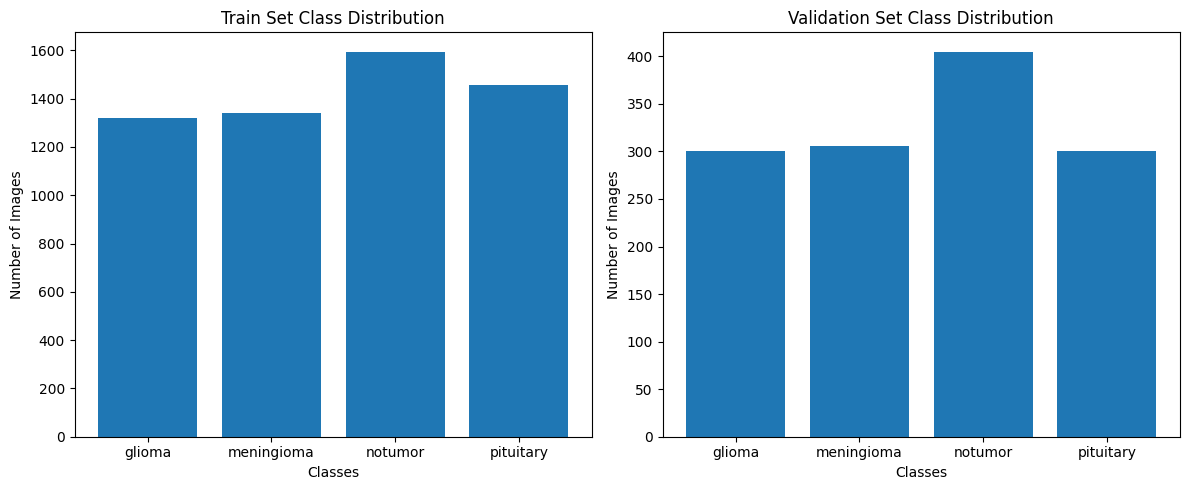

In [ ]:
# Get class counts for train_generator
train_class_counts = np.bincount(train_generator.classes)

# Get class counts for validation_generator (test_generator)
val_class_counts = np.bincount(validation_generator.classes)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for train_generator
axes[0].bar(class_labels, train_class_counts)
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of Images')
axes[0].set_title('Train Set Class Distribution')

# Plot histogram for validation_generator
axes[1].bar(class_labels, val_class_counts)
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Number of Images')
axes[1].set_title('Validation Set Class Distribution')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Load the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch32-224-in21k')

# Load the pre-trained ViT-B/32 model
model = ViTForImageClassification.from_pretrained('google/vit-base-patch32-224-in21k', num_labels=n_classes) # Changed to ViTForImageClassification

# Reset the id2label and label2id mappings in the config
model.config.id2label = {i: str(i) for i in range(n_classes)}  # Update this if you have specific class names
model.config.label2id = {str(i): i for i in range(n_classes)} # Update this if you have specific class names

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/352M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch32-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def preprocess_function(examples):
    # Convert images to RGB format if they are not already
    examples['image'] = [img.convert('RGB') for img in examples['image']]
    examples['pixel_values'] = feature_extractor(examples['image'], return_tensors='pt').pixel_values
    return examples

dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/5712 [00:00<?, ? examples/s]

Map:   0%|          | 0/1311 [00:00<?, ? examples/s]

In [ ]:
!pip install --upgrade transformers

from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(
    output_dir="./vit-image-classification",
    per_device_train_batch_size=batch_size,
    evaluation_strategy="epoch",
    num_train_epochs=epochs,
    fp16=True,
    logging_dir='/content/drive/My Drive/Training logs/',  # Save logs to a local directory
    learning_rate=2e-5,
    save_total_limit=2,
    report_to="none"  # Disable reporting to external services like wandb
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['test'],
)

train_results = trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_loss': 0.10896836966276169, 'eval_runtime': 392.7453, 'eval_samples_per_second': 3.338, 'eval_steps_per_second': 0.418, 'epoch': 3.0}


In [ ]:
predictions = trainer.predict(dataset['test'])

In [ ]:
predicted_labels = np.argmax(predictions.predictions, axis=1)

In [ ]:
true_labels = predictions.label_ids

Confusion Matrix


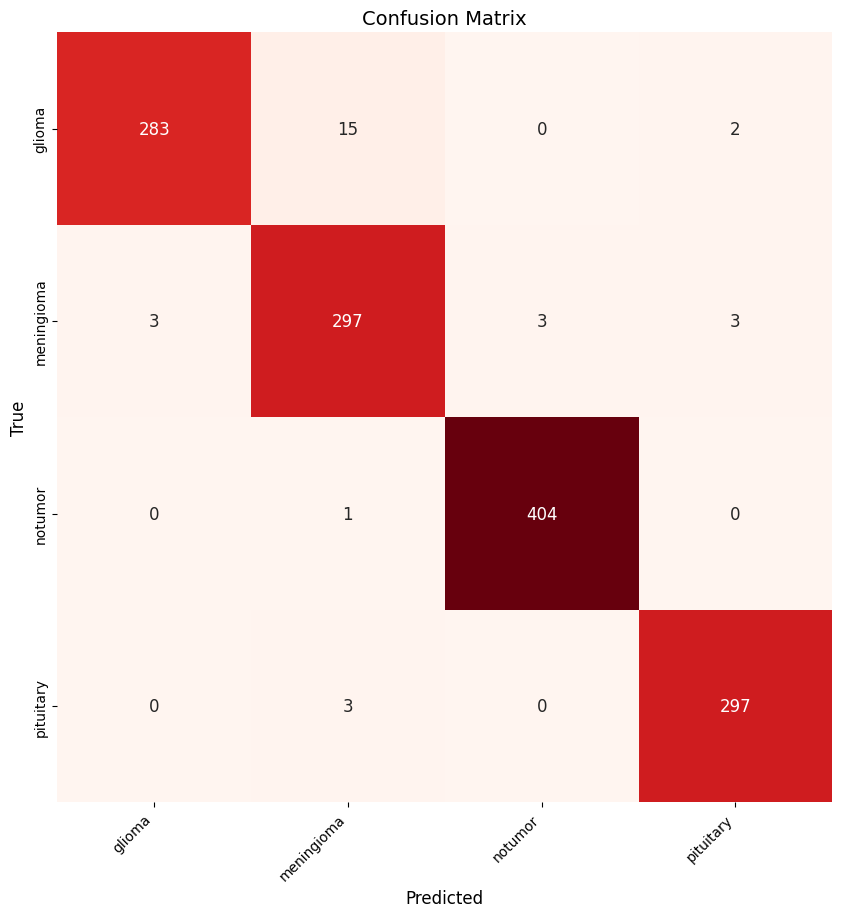

              precision    recall  f1-score   support

      glioma       0.99      0.94      0.97       300
  meningioma       0.94      0.97      0.95       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.98      0.99      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



In [ ]:
# Get the class labels
class_labels = list(train_generator.class_indices.keys())

#show results
print('Confusion Matrix')
# Access the predictions from the PredictionOutput object and convert to NumPy array
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Assuming validation_generator.classes contains the true labels for your validation data
confusion = confusion_matrix(validation_generator.classes, predicted_labels)

# Adjust figure size for better visibility
plt.figure(figsize=(10, 10))  # Reduced figure size

# Create heatmap with annotations and labels
sn.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={"size": 12})  # Increased font size for annotations

plt.xlabel('Predicted', fontsize=12)  # Increased font size for x-axis label
plt.ylabel('True', fontsize=12)  # Increased font size for y-axis label
plt.title('Confusion Matrix', fontsize=14)  # Increased font size for title
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotated x-axis labels for better readability
plt.yticks(fontsize=10)  # Increased font size for y-axis labels
plt.show()

# Generate and print classification report
report = classification_report(true_labels, predicted_labels, target_names=dataset['train'].features['label'].names)
print(report)